In [27]:
from compare_simulators import CalculatorComparator
from population_simulator import CerfaPopulationSimulator
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
# Creating the comparator and loading existing results

comp = CalculatorComparator()
comp.load_results_from_json('1aj-1bj-f-2000')

revdisp = comp.get_variable_from_openfisca('revdisp')
ages_dec_2 = list(map(lambda x: x.get('0DB', 1920), comp.testcases))

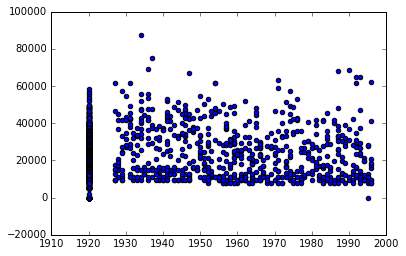

In [29]:
plt.scatter(
    ages_dec_2,
    revdisp)

In [47]:
from reformators import Excalibur

population = []
original_index = []
for i in range(0, len(comp.testcases)):
    case = comp.testcases[i]
    if case.get('1AJ', 0) < 1 and case.get('1BJ', 0) < 1:
        original_index.append(i)
        new_family = {}
        new_family['taxable_income'] =  case.get('1AJ', 0)
        new_family['revdisp'] = revdisp[i]

        if 'F' in case:
            if case['F'] == 1:
                new_family['enfant_unique'] = 1
            if case['F'] >= 2:
                new_family['enfants_deux_ou_plus'] = 1
            if case['F'] > 2:
                new_family['enfants_supplementaire'] = case['F'] - 2
            new_family['nb_enfants'] = case['F']

        if 'O' in case or 'M' in case:
            new_family['en couple'] = 1

        one_declarant_above_23 = False
        both_declarant_parent_below_23 = 'F' in case

        if '0DA' in case:
            age = 2014 - case['0DA']
            new_family['age-dec1'] = age
#             if age <= 23 and 'F' in case:
#                 new_family['declarant parent <= 23 ans'] = 1
            if age  > 23:
                one_declarant_above_23 = True
                both_declarant_parent_below_23 = False
#                 new_family['declarant > 23 ans'] = 1
            if age  > 64:
                new_family['declarant > 64 ans'] = 1
        if '0DB' in case:
            age = 2014 - case['0DB']
            new_family['age-dec2'] = age
            if age  > 23:
                one_declarant_above_23 = True
                both_declarant_parent_below_23 = False
#                 new_family['codeclarant > 23 ans'] = 1
            if age  > 64:
                new_family['codeclarant > 64 ans'] = 1

        if both_declarant_parent_below_23:
            new_family['both_declarant_parent_below_23'] = True
            
        if one_declarant_above_23:
            new_family['one_declarant_above_23'] = True

        if 'F' in case and ('C' in case or 'D' in case or 'V' in case):
            new_family['parent_seul_' + str(case['F'])] = True

        if 'F' in case and ('M' in case or 'O' in case):
            new_family['parents_en_couple'] = True

        population.append(new_family)

print 'Population size: ' + repr(len(population))

total_people = 0
for family in comp.testcases:
    total_people += 1
    if '0DB' in family and family['0DB'] == 1:
        total_people += 1
    if 'F' in family:
        total_people += family['F']

# We assume that there are 2000000 people with RSA
echantillon =  float(total_people) / 2000000
print 'Echantillon of ' + repr(total_people) + ' people, in percent ' + repr(echantillon)


Population size: 811
Echantillon of 2863 people, in percent 0.0014315


In [51]:
sword = Excalibur(population, 'revdisp', 'taxable_income', echantillon=echantillon)
res = sword.suggest_reform(direct_parameters = ['en couple', 'one_declarant_above_23', 'codeclarant > 64 ans', 'declarant > 64 ans', 'nb_enfants', 'both_declarant_parent_below_23'],
                           segmentation_parameters = [],
                           save=200000000)

Population size = 811
['en couple', 'one_declarant_above_23', 'codeclarant > 64 ans', 'declarant > 64 ans', 'nb_enfants', 'both_declarant_parent_below_23']
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=582173, Thu Sep 22 11:55:08 2016)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      9 5.820170285481451e+06 1.0e+00 9.49e+03  9e+03  1e+04 0:0.0
    2     18 3.211923231660582e+06 1.2e+00 8.45e+03  8e+03  9e+03 0:0.1
    3     27 3.280977779031012e+06 1.2e+00 8.06e+03  7e+03  8e+03 0:0.1
Average error per person = 10335 saving 5241 millions
Average error per person = 3473 saving -793 millions
Average error per person = 2837 saving 1439 millions
Average error per person = 1803 saving 887 millions
Average error per person = 859 saving 358 millions
Average error per person = 902 saving 434 millions
Average error per person = 641 saving 245 millions
Average error per person = 519 saving 215 millions
Average error per person = 490 saving 214 millions

In [22]:
sword = Excalibur(population,'revdisp', 'taxable_income')
res = sword.suggest_reform([
                            'enfant_unique',
                            'enfants_deux_ou_plus',
                            'enfants_supplementaire',
                            'one_declarant_above_23',
                            'declarant > 64 ans',
                            'codeclarant > 64 ans',
                            'both_declarant_parent_below_23',
                            'en couple',
                           ])

Population size = 811
['enfant_unique', 'enfants_deux_ou_plus', 'enfants_supplementaire', 'one_declarant_above_23', 'declarant > 64 ans', 'codeclarant > 64 ans', 'both_declarant_parent_below_23', 'en couple']
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 8 (seed=560266, Wed Sep 21 18:08:18 2016)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     10 4.653662757854871e+06 1.0e+00 9.49e+03  9e+03  1e+04 0:0.0
    2     20 5.184304708797895e+06 1.2e+00 8.07e+03  8e+03  8e+03 0:0.1
Average error per person = 6162 saving 4 millions
    3     30 2.822296716613140e+06 1.2e+00 7.02e+03  7e+03  7e+03 0:0.1
Average error per person = 11255 saving 9 millions
Average error per person = 3277 saving 1 millions
Average error per person = 2725 saving 0 millions
Average error per person = 3170 saving 0 millions
Average error per person = 808 saving 0 millions
Average error per person = 594 saving 0 millions
Average error per person = 969 saving 0 millions
Average error 

In [49]:
original_population = []
original_revdisp = []
for i in range(0, len(population)):
    original_population.append(comp.testcases[original_index[i]])
    original_revdisp.append(revdisp[original_index[i]])

simulated_results = sword.compare_population_to_results(population, res[0])

order = sorted(range(len(simulated_results)), key=lambda k: simulated_results[k] - original_revdisp[k])

for i in order:
    print 'Case ' + repr(original_population[i]) + ' Value =' + repr(int(original_revdisp[i])) + ' Simulated = ' + repr(int(simulated_results[i]))

Case {u'F': 5, u'M': 1, u'year': 2014, u'1BJ': 0, u'0DB': 1994, u'0DA': 1960, u'1AJ': 0} Value =19673 Simulated = 15883
Case {u'F': 5, u'M': 1, u'year': 2014, u'1BJ': 0, u'0DB': 1988, u'0DA': 1979, u'1AJ': 0} Value =19673 Simulated = 15883
Case {u'F': 4, u'M': 1, u'year': 2014, u'1BJ': 0, u'0DB': 1983, u'0DA': 1988, u'1AJ': 0} Value =16866 Simulated = 14077
Case {u'F': 4, u'M': 1, u'year': 2014, u'1BJ': 0, u'0DB': 1973, u'0DA': 1975, u'1AJ': 0} Value =16866 Simulated = 14077
Case {u'F': 4, u'M': 1, u'year': 2014, u'1BJ': 0, u'0DB': 1947, u'0DA': 1991, u'1AJ': 0} Value =18440 Simulated = 16327
Case {u'F': 4, u'M': 1, u'year': 2014, u'1BJ': 0, u'0DB': 1936, u'0DA': 1982, u'1AJ': 0} Value =18440 Simulated = 16327
Case {u'F': 3, u'M': 1, u'year': 2014, u'1BJ': 0, u'0DB': 1974, u'0DA': 1965, u'1AJ': 0} Value =14181 Simulated = 12270
Case {u'F': 3, u'M': 1, u'year': 2014, u'1BJ': 0, u'0DB': 1971, u'0DA': 1973, u'1AJ': 0} Value =14181 Simulated = 12270
Case {u'F': 3, u'M': 1, u'year': 2014, u